# Домашнее задание по статистическому анализу на python

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [8]:
import pandas as pd
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [11]:
import pandas as pd
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df.head(5)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

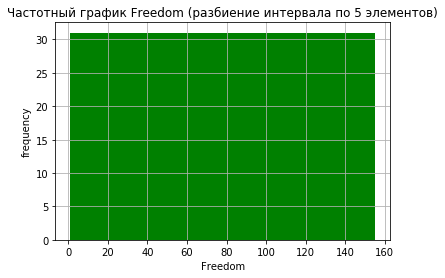

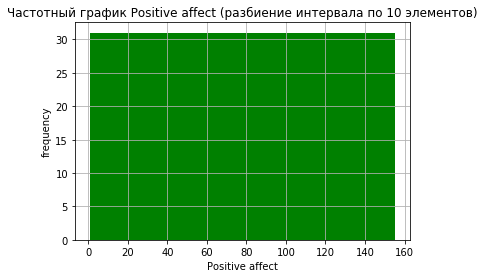

In [13]:
import pandas as pd
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

# частотный график Freedom
n, bins, patches = plt.hist(df['Freedom'], 5, facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('frequency')
plt.title('Частотный график Freedom (разбиение интервала по 5 элементов)')
plt.grid(True)
plt.show()

# параметр Freedom имеет равномерное распределение

# частотный график Positive affect
n, bins, patches = plt.hist(df['Positive affect'], 5, facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('frequency')
plt.title('Частотный график Positive affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

# параметр Positive affect имеет равномерное  распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [15]:
# Медиана Freedom
#1 метод
Freedom = df['Freedom']
num_Freedom = len(Freedom)
sorted_Freedom = sorted(Freedom)

middle = (num_Freedom // 2)
if num_Freedom%2==0:
  result = (sorted_Freedom[middle-1] + sorted_Freedom[middle])/2
else:
  result = sorted_Freedom[middle]
print('Медиана: ', result)

#2 метод
import statistics
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  71.0
Медиана:  71.0


In [23]:
# Мода Freedom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df=df.loc[df['Country (region)']!='Qatar',:]
Freedom = df['Freedom']

#1 метод
freedom_counts = {}
for p in Freedom:
    if p not in freedom_counts:
        freedom_counts[p] = 1
    else:
        freedom_counts[p] += 1

maxp = 0
mode_freedom = None
for k, v in freedom_counts.items():
    if maxp < v:
        maxp = v
        mode_freedom = k
print('Значение моды: ', mode_freedom, 'Количество встречаемости: ', maxp)
        
#2 метод
print('Значение моды: ', statistics.mode(Freedom))

Значение моды:  5.0 Количество встречаемости:  1


StatisticsError: no unique mode; found 155 equally common values

In [22]:
# Математическое ожидание Freedom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
Freedom = df['Freedom']
#Freedom.isnull().sum()
df=df.loc[df['Country (region)']!='Qatar',:]

statistics.mean(df['Freedom'])
#sum(df['Freedom'])/len(df['Freedom'])

78.0

In [28]:
# стандартное отклонение Freedom
print('Стандартное отклонение ряда значений Freedom 1-м методом:',statistics.pstdev(Freedom))

def stdev(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    return (diffs/(len(nums)-1))**(0.5)

print('Стандартное отклонение ряда значений Freedom 2-м методом:',stdev(Freedom))

#дисперсию Freedom
print('Дисперсия ряда значений Freedom:',statistics.pvariance(Freedom))

Стандартное отклонение ряда значений Freedom 1-м методом: 44.74371464239419
Стандартное отклонение ряда значений Freedom 2-м методом: 44.88875137492688
Дисперсия ряда значений Freedom: 2002.0


In [29]:
# минимум и максимум, размах для колонки Freedom
print('Минимальное значение Freedom:', min(Freedom))
print('Максимальное значение Freedom:', max(Freedom))

Freedom_range = max(Freedom) - min(Freedom)
print('Размах значений Freedom:',Freedom_range)

Минимальное значение Freedom: 1.0
Максимальное значение Freedom: 155.0
Размах значений Freedom: 154.0


In [30]:
# найти выбросы (если есть)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
Freedom = df['Freedom']
Freedom.isnull().sum()

# есть один выброс

1

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6817698430601657


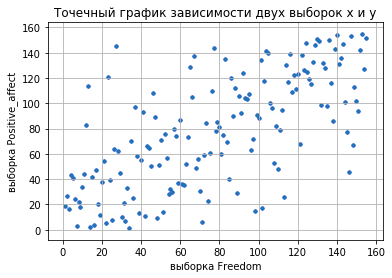

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
Freedom = df['Freedom']
Freedom.isnull().sum()
df=df.loc[df['Country (region)']!='Qatar',:]

Freedom  = df['Freedom']
Positive_affect = df['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive_affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(Freedom, Positive_affect, marker='.',color='b')
# по графику зависимости двух выборок видна прямая взаимосвзяь между значениями Freedom и Positive affect

from scipy.stats import pearsonr
x = df['Freedom']
y = df['Positive affect']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)
# коэффициент корреляции Пирсона близок к нулю, что говорит о высокой линейной взаимосвязи между переменными Freedom
# и Positive affect

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [37]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['Freedom']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0
0  0.025974
1  0.032468
2  0.012987
3  0.038961
4  0.116883


Построить матрицу корреляций для всех колонок таблицы

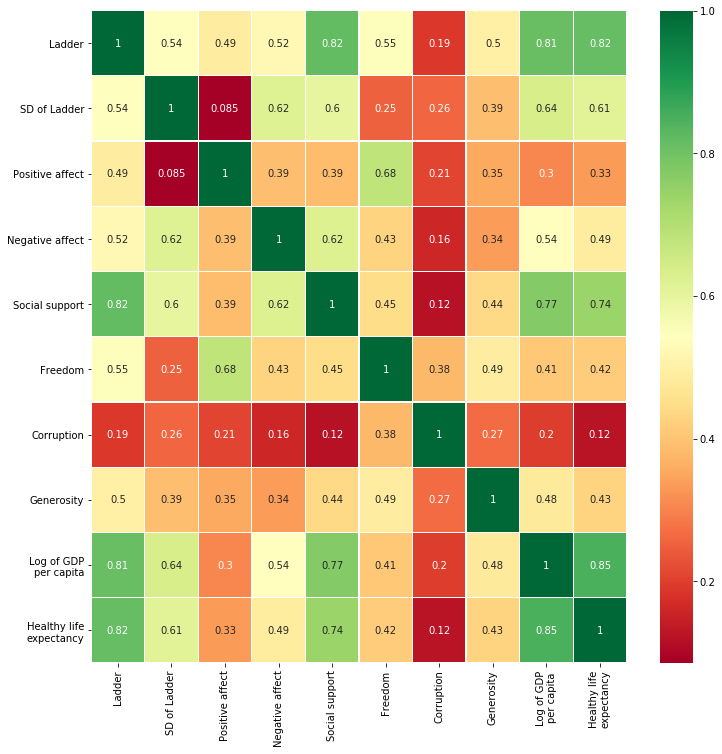

In [38]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

# по матрице корреляций видно, что показатель Ladder (показатель жизненной удовлетворености) имеет
# сильную линейную положительную зависимость от таких показателей, как Social support, Log of GDP per capita,
# Healthy life expectancy и совсем линейно не зависит от показателя Corruption

Загрузить следующую таблицу: 

In [19]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

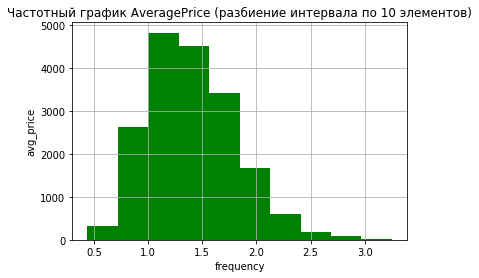

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

n, bins, patches = plt.hist(df['AveragePrice'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('avg_price')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

# распределение нормальное с некоторыми отклонениями

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

Коэффициент корреляции Пирсона: -0.2083170484878848


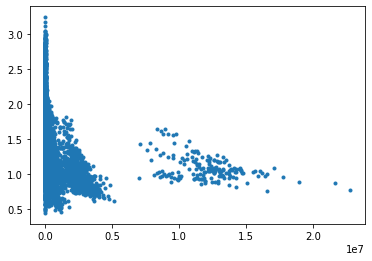

In [43]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)

from scipy.stats import pearsonr
x = df['4046']
y = df['AveragePrice']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

# судя по графику зависимости и значению коэффициента Пирсона - линейной свзяи между показателями
# Total number of avocados with PLU 4046 sold и Average Price практически нет.
# Можно попробовать убрать выбросы со значением Total number of avocados > 6 млн. и снова расчитать коэф-нт Пирсона

Коэффициент корреляции Пирсона: -0.3418591854317798


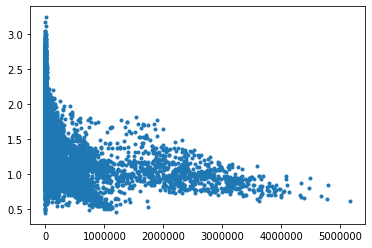

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)

df=df.loc[df['4046']<6000000,:]

from scipy.stats import pearsonr
x = df['4046']
y = df['AveragePrice']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)
# убрать выбросы со значением Total number of avocados > 6 млн. не помогло: коэф-нт Пирсона низкий,
# поэтому можно говорить об очень слабой обратной линейной зависимостью между переменными
# Total number of avocados with PLU 4046 sold и Average Price 